# Projeto 3 - World Happiness Report

Grupo: Gregório Gaio, Guilherme César, Lucas Medeiros, Rodrigo Cruz e Vinicius Maciel

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [64]:
db_2015 = pd.read_csv('2015.csv',delimiter=',')
db_2016 = pd.read_csv('2016.csv',delimiter=',')
db_2017 = pd.read_csv('2017.csv',delimiter=',')
db_2018 = pd.read_csv('2018.csv',delimiter=',')
db_2019 = pd.read_csv('2019.csv',delimiter=',')

#### 1. Top 10 índices de felicidade de cada ano de 2015-2019

In [65]:
db_todos_anos_pais = pd.DataFrame({'Countries 2015': db_2015['Country'],'Countries 2016':db_2016['Country'],'Countries 2017':db_2017['Country'],
'Countries 2018':db_2018['Country or region'],'Countries 2019':db_2019['Country or region']})
db_top_10_todos_anos = db_todos_anos_pais.head(10)
display(db_top_10_todos_anos)

,Countries 2015,Countries 2016,Countries 2017,Countries 2018,Countries 2019
0,Switzerland,Denmark,Norway,Finland,Finland
1,Iceland,Switzerland,Denmark,Norway,Denmark
2,Denmark,Iceland,Iceland,Denmark,Norway
3,Norway,Norway,Switzerland,Iceland,Iceland
4,Canada,Finland,Finland,Switzerland,Netherlands
5,Finland,Canada,Netherlands,Netherlands,Switzerland
6,Netherlands,Netherlands,Canada,Canada,Sweden
7,Sweden,New Zealand,New Zealand,New Zealand,New Zealand
8,New Zealand,Australia,Sweden,Sweden,Canada
9,Australia,Sweden,Australia,Australia,Austria


- Preparando um novo DataFrame para plotagem e plotando um gráfico de linhas para facilitar a visualização

In [125]:
ind = db_top_10_todos_anos.melt().iloc[:,1].unique()
df_posicoes = pd.DataFrame(data={'Country':ind})
df_posicoes = df_posicoes.merge(db_2015[['Country', 'Happiness Rank']], on='Country').merge(db_2016[['Country', 'Happiness Rank']], on='Country')\
    .merge(db_2017[['Country', 'Happiness.Rank']], on='Country').merge(db_2018[['Country or region', 'Overall rank']], left_on='Country', right_on='Country or region')\
        .merge(db_2019[['Country or region', 'Overall rank']], left_on='Country', right_on='Country or region').drop(columns=['Country or region_x', 'Country or region_y'])\
            .set_index('Country').rename(columns={'Happiness Rank_x':'2015','Happiness Rank_y':'2016','Happiness.Rank':'2017','Overall rank_x':'2018','Overall rank_y':'2019'})
df_posicoes_t = df_posicoes.T
display(df_posicoes_t)

Country,Switzerland,Iceland,Denmark,Norway,Canada,Finland,Netherlands,Sweden,New Zealand,Australia,Austria
2015,1,2,3,4,5,6,7,8,9,10,13
2016,2,3,1,4,6,5,7,10,8,9,12
2017,4,3,2,1,7,5,6,9,8,10,13
2018,5,4,3,2,7,1,6,9,8,10,12
2019,6,4,2,3,9,1,5,7,8,11,10


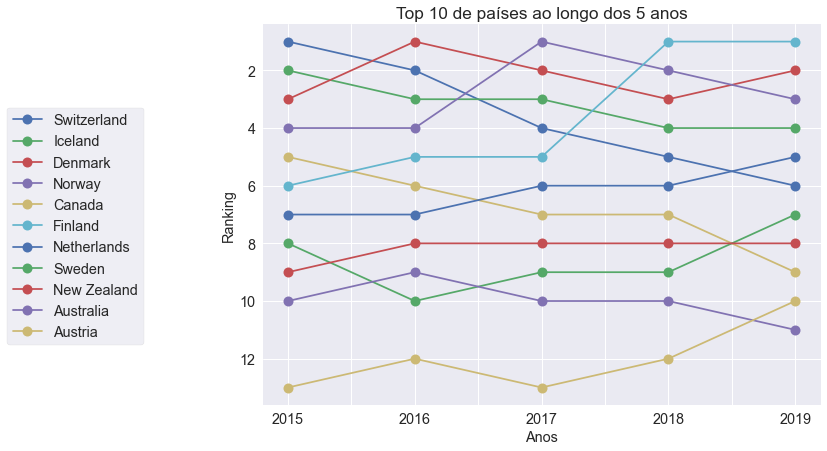

In [131]:
df_posicoes_t.plot(kind="line", figsize=(10, 7), marker="o", ms=10, fontsize = 'large').invert_yaxis()
plt.legend(bbox_to_anchor=(-0.2, 0.80), fontsize = 'large', frameon=True, )
plt.ylabel("Ranking", fontsize = 'large')
plt.xlabel('Anos',fontsize = 'large')
plt.title('Top 10 de países ao longo dos 5 anos', fontsize = 'x-large')
plt.show()

- Os 10 primeiros não se alteram ao longo dos 5 anos, com exceção da Áustria e Austrália. <br>
- Dinamarca sempre no top 3.<br>
- Maioria dos paises sao Europeus (mais Australia, Canada, e Nova Zelandia).

#### 2. Considerando a média de todas as variáveis, quais foram as 3 variáveis que mais mudaram ano a ano 

In [ ]:
db_2015_medias = pd.Series(db_2015.mean(axis=0))
db_2016_medias = pd.Series(db_2016.mean(axis=0))
db_2017_medias = pd.Series(db_2017.mean(axis=0))
db_2018_medias = pd.Series(db_2018.mean(axis=0))
db_2019_medias = pd.Series(db_2019.mean(axis=0))

- Precisamos renomear as colunas para evitar problemas

In [ ]:
db_2015_medias.rename(index={'Standard Error': 'Lower Confidence Interval'}, inplace= True)
db_2015_medias['Upper Confidence Interval'] = db_2015_medias['Happiness Score'] + db_2015_medias['Lower Confidence Interval'] 
db_2015_medias['Lower Confidence Interval'] = db_2015_medias['Happiness Score'] - db_2015_medias['Lower Confidence Interval']

In [ ]:
db_2017_medias.rename(index={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score',
'Whisker.low': 'Lower Confidence Interval', 'Whisker.high': 'Upper Confidence Interval',
'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 'Health..Life.Expectancy.': 'Health (Life Expectancy)',
'Trust..Government.Corruption.': 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual'}, inplace= True)

In [ ]:
db_2018_medias.rename(index={'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score',
'Freedom to make life choices': 'Freedom',
'GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy': 'Health (Life Expectancy)',
'Perceptions of corruption': 'Trust (Government Corruption)', 'Social support': 'Family'}, inplace= True)

In [ ]:
db_2019_medias.rename(index={'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score',
'Freedom to make life choices': 'Freedom',
'GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy': 'Health (Life Expectancy)',
'Perceptions of corruption': 'Trust (Government Corruption)', 'Social support': 'Family'}, inplace= True)

- Fizemos a variação relativa entre as médias

In [ ]:
db_variacoes_15_16 = pd.DataFrame({'Medias 2015': db_2015_medias, 'Medias 2016': db_2016_medias})
db_variacoes_16_17 = pd.DataFrame({'Medias 2016': db_2016_medias, 'Medias 2017': db_2017_medias})
db_variacoes_17_18 = pd.DataFrame({'Medias 2017': db_2017_medias, 'Medias 2018': db_2018_medias})
db_variacoes_18_19 = pd.DataFrame({'Medias 2018': db_2018_medias, 'Medias 2019': db_2019_medias})

db_variacoes_15_16['Maiores Variações'] = db_variacoes_15_16.apply(lambda x: np.std(x)/np.mean(x), axis=1)
display('Variacoes 15-16', db_variacoes_15_16['Maiores Variações'].sort_values(ascending=False).head(3))

db_variacoes_16_17['Maiores Variações'] = db_variacoes_16_17.apply(lambda x: np.std(x)/np.mean(x), axis=1)
display('Variacoes 16-17', db_variacoes_16_17['Maiores Variações'].sort_values(ascending=False).head(3))

db_variacoes_17_18['Maiores Variações'] = db_variacoes_17_18.apply(lambda x: np.std(x)/np.mean(x), axis=1)
display('Variacoes 17-18', db_variacoes_17_18['Maiores Variações'].sort_values(ascending=False).head(3))

db_variacoes_18_19['Maiores Variações'] = db_variacoes_18_19.apply(lambda x: np.std(x)/np.mean(x), axis=1)
display('Variacoes 18-19', db_variacoes_18_19['Maiores Variações'].sort_values(ascending=False).head(3))


#### 3. Quais foram os top 3 países que mais tiveram mudança positiva e negativa de GPD

In [ ]:
db_2015_gdp = pd.DataFrame({'GDP 2015': list(db_2015['Economy (GDP per Capita)'])}, index=db_2015['Country'])
db_2016_gdp = pd.DataFrame({'GDP 2016': list(db_2016['Economy (GDP per Capita)'])}, index=db_2016['Country'])
db_2017_gdp = pd.DataFrame({'GDP 2017': list(db_2017['Economy..GDP.per.Capita.'])}, index=db_2017['Country'])
db_2018_gdp = pd.DataFrame({'Country':db_2018['Country or region'], 'GDP 2018': list(db_2018['GDP per capita'])})
db_2019_gdp = pd.DataFrame({'Country':db_2019['Country or region'], 'GDP 2019': list(db_2019['GDP per capita'])})

In [ ]:
db_gdp_16_17 = db_2016_gdp.merge(db_2017_gdp, on='Country')
db_gdp_16_17['delta GDP'] = db_gdp_16_17['GDP 2017'] - db_gdp_16_17['GDP 2016']
display(db_gdp_16_17['delta GDP'].nlargest(3)) #tres maiores positivos
display(db_gdp_16_17['delta GDP'].nsmallest(3)) #tres maiores negativos

#### 5. Qual foi o país que mais subiu no ranking no período inteiro analisado

- Dropamos as colunas irrelevantes e renomeamos o resto

In [ ]:
db_2015_limpa= db_2015.drop(['Standard Error','Region','Dystopia Residual'],axis=1)

In [ ]:
db_2016_limpa= db_2016.drop(['Region','Lower Confidence Interval', 'Upper Confidence Interval','Dystopia Residual'],axis=1)

In [ ]:
db_2017_limpa= db_2017.drop(['Whisker.high','Whisker.low','Dystopia.Residual'],axis=1)
db_2017_limpa.columns=['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']

In [ ]:
db_2018_limpa=db_2018
db_2018_limpa.columns=['Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']

In [ ]:
db_2019_limpa=db_2019
db_2019_limpa.columns=[ 'Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']

In [ ]:
df_happiness_rank = db_2015_limpa[['Country','Happiness Rank']].merge(db_2019_limpa[['Country','Happiness Rank']], on='Country', suffixes=('_2015','_2019'))
df_happiness_rank['Delta Happiness'] = df_happiness_rank['Happiness Rank_2015'] - df_happiness_rank['Happiness Rank_2019']
df_happiness_rank.nlargest(1, columns='Delta Happiness')

#### 6. Teve países que saíram ou entraram do index?

- A princípio, qualquer país que apareça menos de 5 vezes foi incluído ou tirado da lista

In [ ]:
aparicoes_paises = pd.concat([db_2015_limpa['Country'],db_2016_limpa['Country'],db_2017_limpa['Country'],db_2018_limpa['Country'],db_2019_limpa['Country']]).reset_index()
serie_aparicoes = aparicoes_paises.groupby('Country').agg('size')
paises_movimentados = serie_aparicoes[serie_aparicoes<5]
print(paises_movimentados)

Após análise da lista, a equipe percebeu que alguns países representados na base de dados mudaram de nome ao longo do tempo, entretanto, nunca foram excluídos ou inseridos no index, poluíndo assim a lista final. A partir de pesquisas, os países que mudaram de nome e estiveram sempre no index foram removidos manualmente da lista. Ademais, o país 'Somaliland Region', possuía em uma das bases um erro de digitação, em que uma nas letras iniciais estava minúscula. Esse dado também foi retirado da lista final.

In [ ]:
paises_movimentados  = paises_movimentados.drop(['Hong Kong', 'Hong Kong S.A.R., China', 'North Cyprus', 'Northern Cyprus', 'Somaliland region', 'Taiwan', 'Taiwan Province of China', 'Trinidad & Tobago', 'Trinidad and Tobago', 'Macedonia', 'North Macedonia'])
lista_paises_movimentados = list(paises_movimentados.index)
print(lista_paises_movimentados)

#### 7. Quais foram os 3 países que mais tiveram mudança na expectativa de vida, positiva e negativa de 2017 para 2018

In [ ]:
db_life_expectancy = db_2017_limpa[['Country', 'Health (Life Expectancy)']].merge(db_2018_limpa[['Country', 'Health (Life Expectancy)']], on='Country', suffixes=('_2017', '_2018'))
db_life_expectancy['delta life expectancy'] = db_life_expectancy['Health (Life Expectancy)_2018'] - db_life_expectancy['Health (Life Expectancy)_2017']
display(db_life_expectancy.nlargest(3, columns='delta life expectancy')) #tres maiores positivos
display(db_life_expectancy.nsmallest(3, columns='delta life expectancy')) #tres maiores negativos

#### 8. Até 2 questões extras que vocês acham interessante analisar

8a. Últimos 10 índices de felicidade de cada ano de 2015-2019

- Parecida com a primeira questão, mas como o número de países na lista varia, precisamos pegar os 10 ano a ano e depois concatenar

In [ ]:
ten_lowest_15=db_2015_limpa.nsmallest(10,'Happiness Score')
ten_lowest_16=db_2016_limpa.nsmallest(10,'Happiness Score')
ten_lowest_17=db_2017_limpa.nsmallest(10,'Happiness Score')
ten_lowest_18=db_2018_limpa.nsmallest(10,'Happiness Score')
ten_lowest_19=db_2019_limpa.nsmallest(10,'Happiness Score')

In [ ]:
ten_lowest_15_novo=pd.Series(ten_lowest_15['Country']).reset_index(drop=True)
ten_lowest_16_novo=pd.Series(ten_lowest_16['Country']).reset_index(drop=True)
ten_lowest_17_novo=pd.Series(ten_lowest_17['Country']).reset_index(drop=True)
ten_lowest_18_novo=pd.Series(ten_lowest_18['Country']).reset_index(drop=True)
ten_lowest_19_novo=pd.Series(ten_lowest_19['Country']).reset_index(drop=True)
ten_lowest=pd.concat([ten_lowest_15_novo,ten_lowest_16_novo,ten_lowest_17_novo,ten_lowest_18_novo,ten_lowest_19_novo],axis=1)
ten_lowest

8b. Considerando a média de todas as variáveis, quais foram as 3 variáveis que mais mudaram no período de 2015-2019. 

- Aqui, consideramos o desvio padrão normalizado como medida de variação

In [ ]:
db_variacoes_todos_anos = pd.DataFrame({'Medias 2015': db_2015_medias, 'Medias 2016': db_2016_medias, 
'Medias 2017': db_2017_medias, 'Medias 2018': db_2018_medias, 'Medias 2019': db_2019_medias})

db_variacoes_todos_anos['Maiores Variações'] = db_variacoes_todos_anos.apply(lambda x: np.std(x)/np.mean(x), axis=1)
display('Variacoes de 2015 à 2019', db_variacoes_todos_anos['Maiores Variações'].sort_values(ascending=False).head(3))